In [1]:
import pystan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
student = """
data {
    real nu;
    real mu;
    real sigma;
}
generated quantities {
    real y = student_t_rng(nu, mu, sigma);
}
"""
student_model = pystan.StanModel(model_code = student)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9707cb62e2bb926031c82976b1af43eb NOW.


In [7]:
normal = """
data {
    real mu;
    real sigma;
}
generated quantities {
    real y = normal_rng(mu, sigma);
}
"""
normal_model = pystan.StanModel(model_code = normal)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b4786782e07a1755e8a975356770bde8 NOW.


In [30]:
dataNormal = {'mu': 0, 'sigma': 1}
dataStudent1 = {'nu': 1, 'mu': 0, 'sigma': 1}
dataStudent2 = {'nu': 2, 'mu': 0, 'sigma': 1}
dataStudent5 = {'nu': 5, 'mu': 0, 'sigma': 1}
dataStudent7 = {'nu': 7, 'mu': 0, 'sigma': 1}

student1_sam = student_model.sampling(data = dataStudent1, algorithm = 'Fixed_param', iter = 100)
student1_df = pd.DataFrame(student1_sam.extract())
student1_df.drop('lp__', axis = 1, inplace = True)
student2_sam = student_model.sampling(data = dataStudent2, algorithm = 'Fixed_param', iter = 100)
student2_df = pd.DataFrame(student2_sam.extract())
student2_df.drop('lp__', axis = 1, inplace = True)
student5_sam = student_model.sampling(data = dataStudent5, algorithm = 'Fixed_param', iter = 100)
student5_df = pd.DataFrame(student5_sam.extract())
student5_df.drop('lp__', axis = 1, inplace = True)
student7_sam = student_model.sampling(data = dataStudent7, algorithm = 'Fixed_param', iter = 100)
student7_df = pd.DataFrame(student10_sam.extract())
student7_df.drop('lp__', axis = 1, inplace = True)
normal_sam = normal_model.sampling(data = dataNormal, algorithm = 'Fixed_param', iter = 100)
normal_df = pd.DataFrame(normal_sam.extract())
normal_df.drop('lp__', axis = 1, inplace = True)

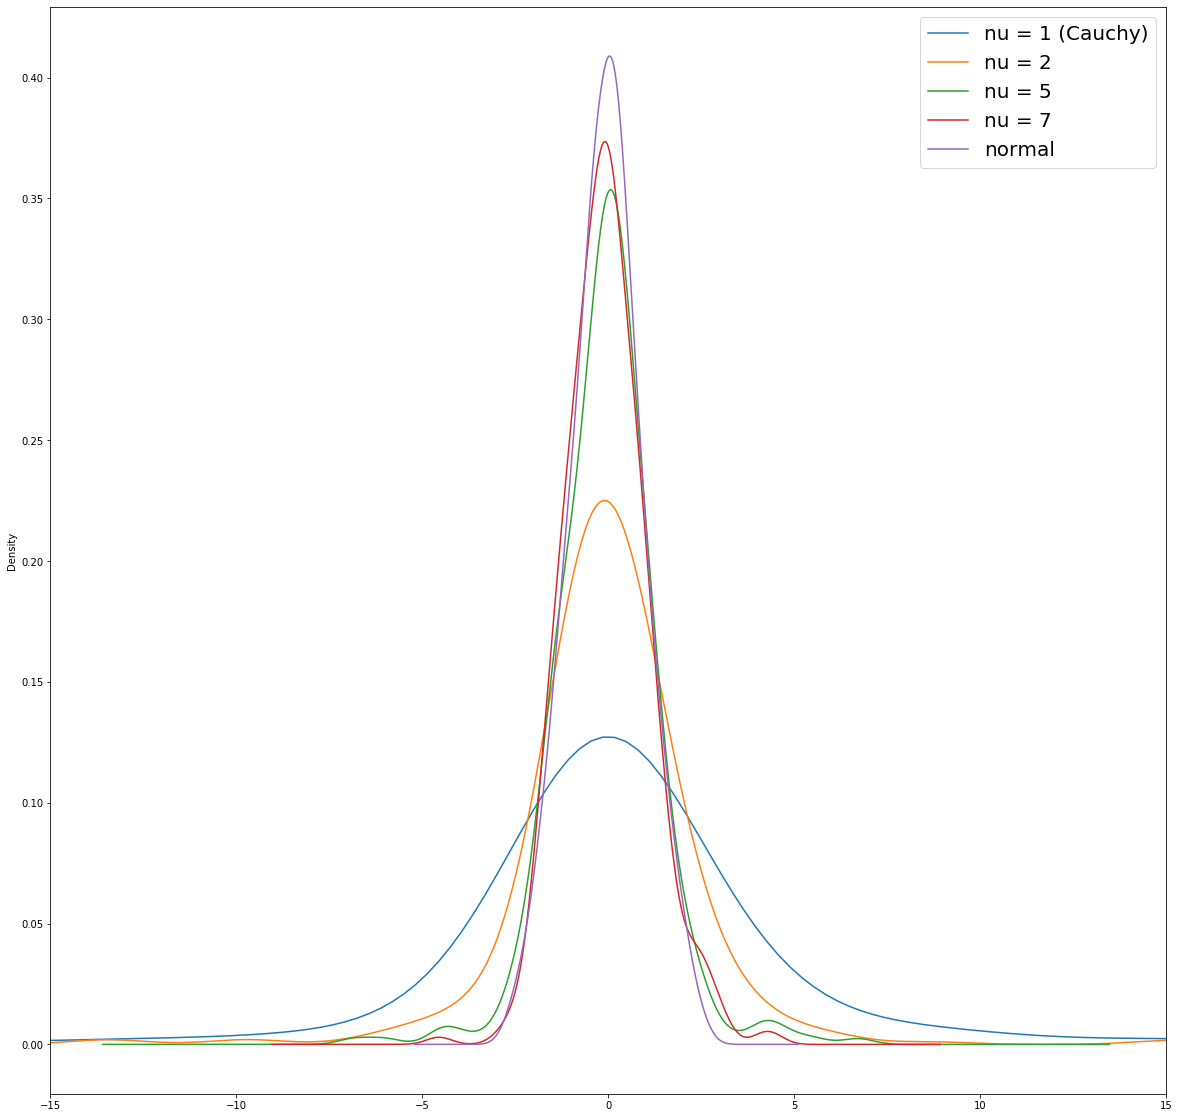

In [31]:
plt.figure(figsize = (20, 20))
plt.xlim([-15, 15])
student1_df['y'].plot.kde()
student2_df['y'].plot.kde()
student5_df['y'].plot.kde()
student7_df['y'].plot.kde()
normal_df['y'].plot.kde()
plt.legend(['nu = 1 (Cauchy)', 'nu = 2',  'nu = 5', 'nu = 7', 'normal'], prop = {'size': 20})
plt.show()

The higher nu the closer t_student distribution gets to the normal distribution

In [22]:
sampleNumbers = [10, 100, 1000, 10000]
sam10 = student_model.sampling(data = dataStudent5, algorithm = 'Fixed_param', iter = 10)
sam10_df = pd.DataFrame(sam10.extract())
sam10_df.drop('lp__', axis = 1, inplace = True)
sam100 = student_model.sampling(data = dataStudent5, algorithm = 'Fixed_param', iter = 100)
sam100_df = pd.DataFrame(sam100.extract())
sam100_df.drop('lp__', axis = 1, inplace = True)
sam1000 = student_model.sampling(data = dataStudent5, algorithm = 'Fixed_param', iter = 1000)
sam1000_df = pd.DataFrame(sam1000.extract())
sam1000_df.drop('lp__', axis = 1, inplace = True)
sam10000 = student_model.sampling(data = dataStudent5, algorithm = 'Fixed_param', iter = 10000)
sam10000_df = pd.DataFrame(sam10000.extract())
sam10000_df.drop('lp__', axis = 1, inplace = True)

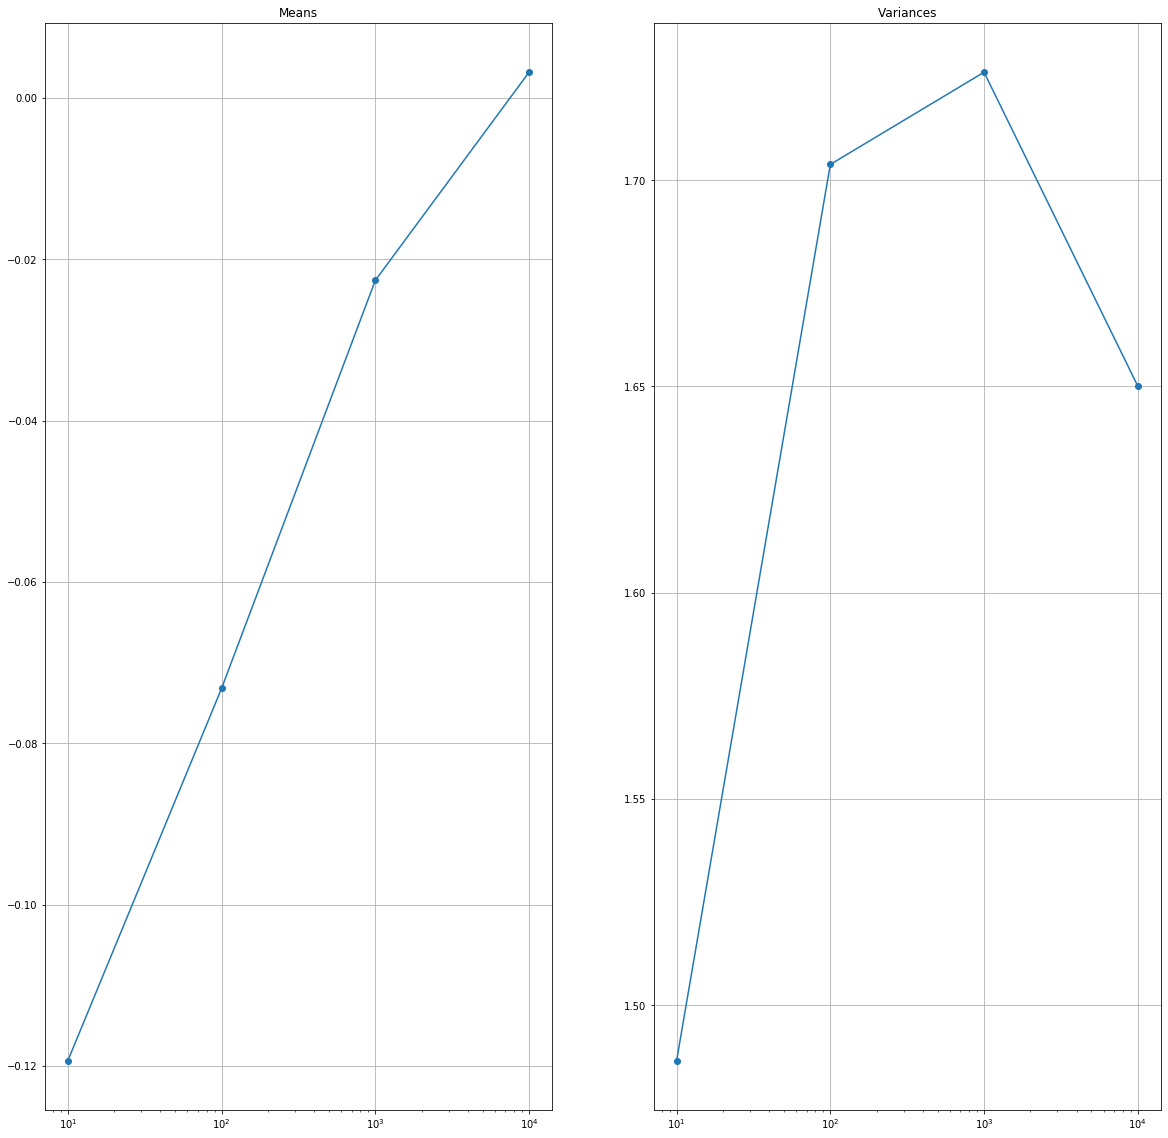

In [23]:
means = []
variances = []
means.append(sam10_df['y'].mean())
means.append(sam100_df['y'].mean())
means.append(sam1000_df['y'].mean())
means.append(sam10000_df['y'].mean())
variances.append(sam10_df['y'].var())
variances.append(sam100_df['y'].var())
variances.append(sam1000_df['y'].var())
variances.append(sam10000_df['y'].var())
plt.figure(figsize = [20, 20])
plt.subplot(1, 2, 1).set_title('Means')
plt.plot(sampleNumbers, means, 'o-')
plt.xscale('log')
plt.grid()
plt.subplot(1, 2, 2).set_title('Variances')
plt.plot(sampleNumbers, variances, 'o-')
plt.xscale('log')
plt.grid()
plt.show()

When number of samples increses, mean approaches 0 and variance approaches 1,(6) which is correct for nu = 5